# MLP(Multi Layer Perceptrons)
- 가중치의 합을 만드는 과정이 여러 번 반복. 
- 중간 단계를 구성하는 은닉 유닛(hidden unit)을 계산하고 이를 이용하여 최종 결과를 산출하기 의해 다시 가중치 합을 계산
- 단순 선형모델의 경우 hidden layer를 만들어서 가중치 합을 계산하는 것은 하나의 가중치합을 계산하는 것과 차이가 없다.
- 따라서 hidden unit의 가중치 합을 계산 후 비선형함수(ReLU, hyperbolic tangent)를 적용.
- ReLU, hyperbolic tangent, sigmoid 함수를 활성화 함수(active funtion)이라 함.
- 복잡도 제어 방법: hidden layer 개수 조정, hidden unit수 조정, alpha 조정
- 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있다는 장점이 있음.
- 학습이 오래걸리고 data 전처리가 필요.(모든 특성이 같은 의미를 가진 동질의 데이터에서 잘 동작)
- 실제 MLP를 쓰고자 한다면 tenserflow등을 사용하는게 나음

In [5]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'ReLU(x), tanh(x)')

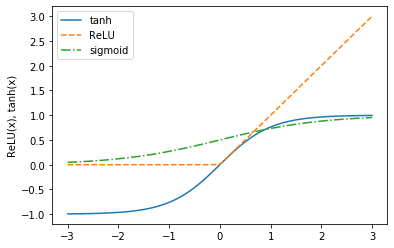

In [9]:
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line),label="tanh")
plt.plot(line, np.maximum(line,0), linestyle='--', label="ReLU")
plt.plot(line, 1/(1+np.exp(-line)), linestyle='-.', label="sigmoid")
plt.legend(loc='best')
plt.ylabel("ReLU(x), tanh(x)")

Text(0, 0.5, 'feature 1')

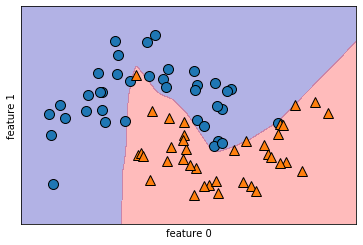

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
#MLP는 기본적으로 hidden unit 100, ReLU 함수 사용
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

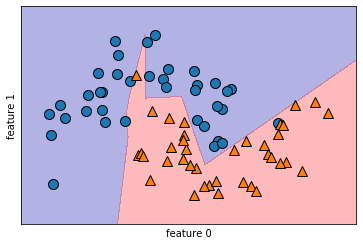

In [20]:
# MLP는 기본적으로 HiddenUnit 100개 사용.
# data가 적은 make_moons에서는 과분하다
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10], max_iter=1000).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

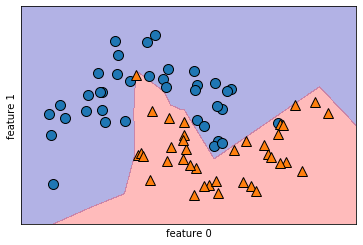

In [21]:
# Hidden layer 추가하기
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10,10], max_iter=1000).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

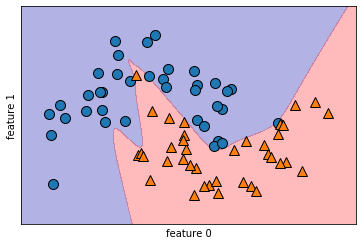

In [22]:
#tanh사용
mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh',hidden_layer_sizes=[10,10], max_iter=1000).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

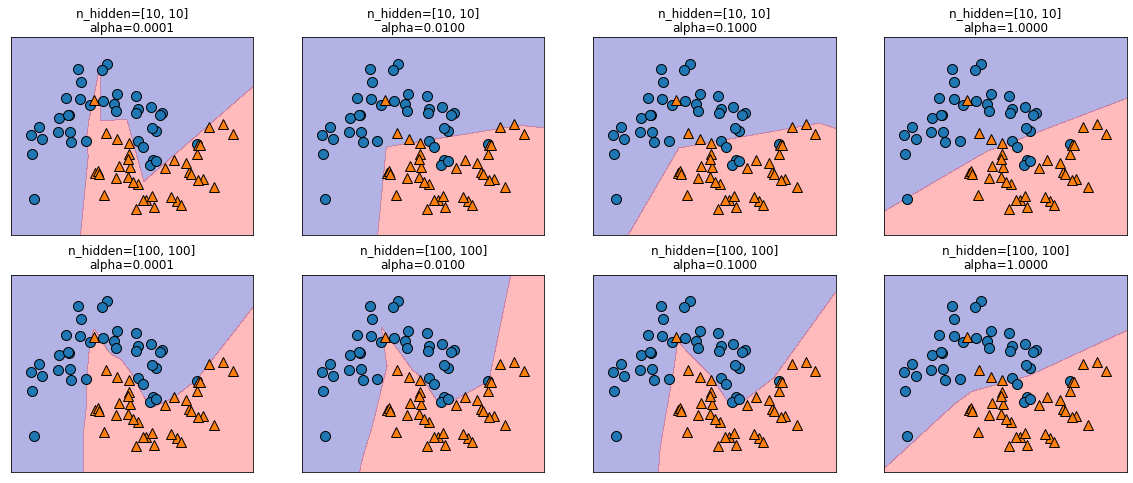

In [26]:
# alpha값 변경을 통해 규제 정도 변경 가능.
# hidden unit 10개, 100개 일 때 각각 alpha변화에 따른 MLP 결과 관찰
fig, axes = plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes,[10,100]):
    for ax, alpha in zip(axx,[0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000, hidden_layer_sizes=[n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [31]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [34]:
print(cancer.data.max(axis=0))

[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42).fit(X_train, y_train)
print("train set score:{:.3f}".format(mlp.score(X_train,y_train)))
print("test set score:{:.3f}".format(mlp.score(X_test,y_test)))

train set score:0.939
test set score:0.916


In [42]:
# Cancer data의 평균을 0 분산은 1이 되도록(정규화)
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train)/std_on_train
X_test_scaled = (X_test-mean_on_train)/std_on_train

mlp = MLPClassifier(random_state=42, max_iter = 1000).fit(X_train_scaled, y_train)
print("train set score:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("test set score:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

mlp = MLPClassifier(random_state=42, max_iter = 1000,alpha=1).fit(X_train_scaled, y_train)
print("train set score:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("test set score:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

train set score:1.000
test set score:0.965
train set score:0.986
test set score:0.979


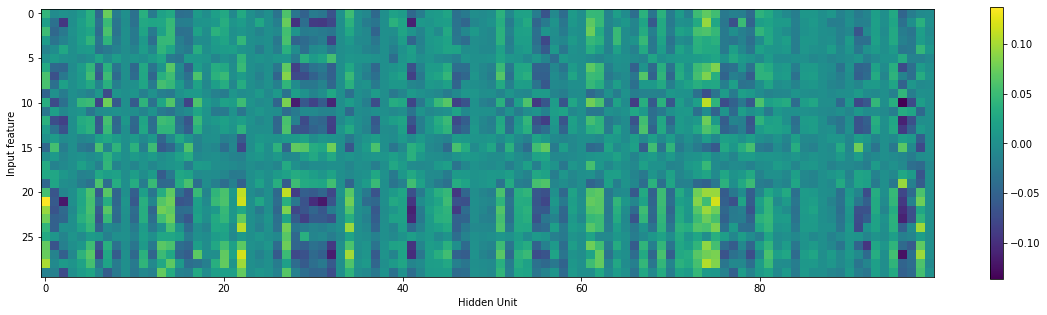

In [53]:
# Cancer data 모델의 가중치 확인
#mlp.coefs_[0]: 입력과 은닉층 사이의 가중치 저장
#mlp.coefs_[1]: 은닉층과 출력 사이 가중치 저장
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none',cmap='viridis')
plt.xlabel("Hidden Unit")
plt.ylabel("Input feature")
plt.colorbar()